<a href="https://colab.research.google.com/github/HuzainAzis/knn-cv/blob/master/sourcecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [276]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt


In [278]:
#load dataset
datatrain = pd.read_csv('/content/drive/My Drive/dataset/inggrid/dataset8020train-test/dataset8020train_10.csv')
datatest = pd.read_csv('/content/drive/My Drive/dataset/inggrid/dataset8020train-test/dataset8020test_10.csv')
#dataset.Type.value_count().plot(kind= "bar")
print (len(datatrain))
print (len(datatest))
datatrain

900
100


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1040,18996,1,179,129.0,140,90,3,3,0,0,0,1
1,1041,21298,1,159,63.0,110,70,3,3,0,0,1,1
2,1043,19681,2,165,72.0,120,80,1,1,0,0,1,1
3,1045,21023,1,170,81.0,170,90,3,3,0,0,0,1
4,1052,22801,1,164,79.0,130,80,3,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1101,17285,1,167,75.0,100,70,1,1,0,0,1,0
896,1106,16003,1,159,77.0,120,80,1,1,0,0,1,0
897,1107,22826,1,162,65.0,140,90,3,3,0,0,1,0
898,1111,23203,2,172,74.0,140,70,2,1,1,0,1,0


In [0]:
#split target and attribute

x_train = datatrain.iloc[:, 1:12]
y_train = datatrain.iloc[:, 12]
x_test = datatest.iloc[:, 1:12]
y_test = datatest.iloc[:, 12]



Text(0.5, 1.0, 'testing')

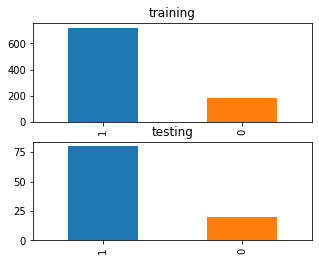

In [280]:
plt.figure(figsize=(5,4))
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('training')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('testing')

In [281]:
# scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test =sc_x.fit_transform(x_test)
x_train

array([[-0.35119491, -0.75      ,  1.72438997, ..., -0.32294656,
        -0.22941573, -1.84709629],
       [ 0.59399417, -0.75      , -0.64265185, ..., -0.32294656,
        -0.22941573,  0.54139029],
       [-0.06993751,  1.33333333,  0.06746069, ..., -0.32294656,
        -0.22941573,  0.54139029],
       ...,
       [ 1.22138293, -0.75      , -0.28759558, ..., -0.32294656,
        -0.22941573,  0.54139029],
       [ 1.37617715,  1.33333333,  0.89592533, ...,  3.09648757,
        -0.22941573,  0.54139029],
       [ 1.17416454,  1.33333333,  0.77757324, ..., -0.32294656,
        -0.22941573, -1.84709629]])

In [282]:
math.sqrt(900)

30.0

In [283]:
akurasi = 0
for x in range(2,900): 
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='euclidean')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    #print result
    cm = confusion_matrix(y_test, y_pred)
    tertinggi = accuracy_score(y_test, y_pred)
    if tertinggi >= akurasi:
        akurasi = tertinggi
        cmx = cm
        k = x
        a = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred,average=None)
        r = recall_score(y_test, y_pred,average=None)
        f = f1_score(y_test, y_pred,average=None)
print("K :" , k)
print(cmx)
print("Akurasi :" , a)
print("presisi :" , p)
print("recall :" , r)
print("F-Score :" , f)
print("--------------------------------------------")

K : 5
[[12  8]
 [ 1 79]]
Akurasi : 0.91
presisi : [0.92307692 0.90804598]
recall : [0.6    0.9875]
F-Score : [0.72727273 0.94610778]
--------------------------------------------


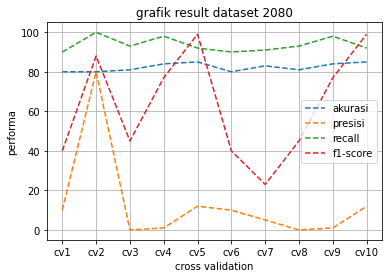

In [286]:
from matplotlib import pyplot as plot
x = ["cv1", "cv2", "cv3", "cv4", "cv5", "cv6", "cv7", "cv8", "cv9", "cv10"]
a= [87,84,84,84,85,80,83,81,84,85]
p= [87,84,83,1,12,10,5,0,1,12]
r= [97,97,100,98,92,90,91,93,98,92]
f= [92,90,91,77,99,40,23,45,77,99]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result dataset 2080")
plt.xlabel("cross validation")
plt.ylabel("performa")
plt.legend(["akurasi","presisi", "recall", "f1-score"])
plt.grid()
plt.show()

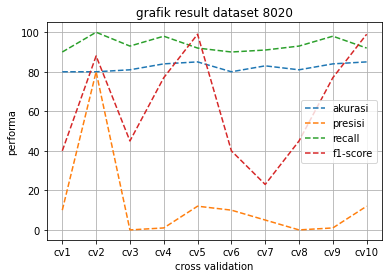

In [287]:
from matplotlib import pyplot as plot
x = ["cv1", "cv2", "cv3", "cv4", "cv5", "cv6", "cv7", "cv8", "cv9", "cv10"]
a= [80,80,81,84,85,80,83,81,84,85]
p= [10,80,0,1,12,10,5,0,1,12]
r= [90,100,93,98,92,90,91,93,98,92]
f= [40,88,45,77,99,40,23,45,77,99]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result dataset 8020")
plt.xlabel("cross validation")
plt.ylabel("performa")
plt.legend(["akurasi","presisi", "recall", "f1-score"])
plt.grid()
plt.show()

[[77, 78, 71, 68, 70, 65], [82, 68, 70, 64, 76, 67, 62, 71], [75, 74, 71, 68, 64, 73], [74, 69, 68, 70, 59, 71], [76, 72, 73, 70, 61, 71], [73, 71, 72, 61, 70, 74, 68], [76, 72, 73, 70, 71, 60], [70, 73, 61, 74], [67, 64, 75, 72, 70, 71, 69], [75, 70, 80, 69, 66, 64, 74, 63]]


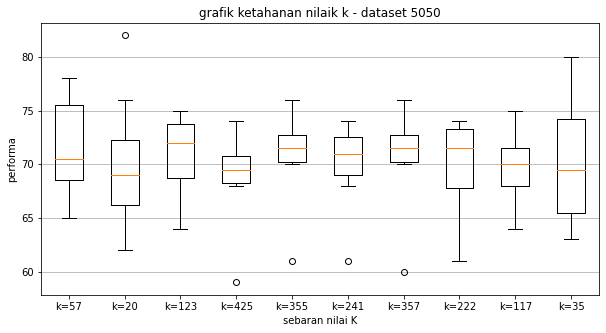

In [285]:
fig1, ax1 = plt.subplots(figsize=(10,5))

# perubahan nilai k
all_data = [
            [77,78,71,68,70,65],
            [82,68,70,64,76,67,62,71],
            [75,74,71,68,64,73],
            [74,69,68,70,59,71],
            [76,72,73,70,61,71],
            [73,71,72,61,70,74,68],
            [76,72,73,70,71,60],
            [70,73,61,74],
            [67,64,75,72,70,71,69],
            [75,70,80,69,66,64,74,63]
          ]
print(all_data)

# plot box plot
ax1.boxplot(all_data)
ax1.set_title('grafik ketahanan nilaik k - dataset 5050')

#adding horizontal grid lines

ax1.yaxis.grid(True)
ax1.set_xticks([y +1 for y in range(len(all_data))])
ax1.set_xlabel('sebaran nilai K')
ax1.set_ylabel('performa')

#add x-tick labels
plt.setp(ax1, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=[ 'k=57','k=20','k=123','k=425','k=355','k=241','k=357','k=222','k=117','k=35'])
plt.show()